# Source Code Tubes AI
# Kelompok 4
Beatrice Syafira - 18119014;
Dira Shafa A - 18119019;
Larastya Devindira H. - 18119022;
M. Sulthan Ariq - 18119034






## Bagian 1: Import library dan dataset

In [ ]:
# Data representation
import pandas as pd
import numpy as np 

# NLP libraries
!pip install textblob
from textblob import TextBlob,Word
from nltk.corpus import stopwords
from nltk import download as nltk_dl
nltk_dl('stopwords')
nltk_dl('punkt')
nltk_dl('wordnet')

# File processing   
from google.colab import files

# Visualisasi data
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Dataset
uploaded = files.upload()
data=pd.read_csv('dataset_sms_spam_v1.csv',on_bad_lines='skip')
data[0:1000]
print('Banyak SMS yang ada: {}\n'.format(data.shape[0]))
print('Banyak duplikat: {}\n'.format(data.duplicated().sum()))
print('Informasi lain:')
data.isnull().sum()
data.info()
data.sum()

Saving dataset_sms_spam_v1.csv to dataset_sms_spam_v1 (2).csv
Banyak SMS yang ada: 1143

Banyak duplikat: 1

Informasi lain:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


Teks     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...
label                                                  813
dtype: object

## Bagian 2 : Sanitisasi dataset

In [ ]:
# Menghilangkan duplikat
data.drop_duplicates(inplace=True)

# Mengubah labeling yang salah
data = data.replace({'label' : 2}, 1)

# Mengubah textcase menjadi all lowercase
data['Teks']=data['Teks'].str.lower()
data[0:1000]

,Teks,label
0,promo beli paket flash 1gb my telkomsel app dp...,1
1,25 gb30 rp 35 ribu spesial terpilih aktifkan 5...,1
2,20160708 114711plg yth sisa kuota flash 478kb ...,1
3,20160807 112947plg yth sisa kuota flash 7160kb...,1
4,45gb30 rp 55 ribu spesial terpilih aktifkan 55...,1
...,...,...
997,perusahaannya tau,0
998,pesan assalamualaikum wrwb pak indonesia andro...,0
999,pesanan 342877938 mohon transfer rp59755 bni a...,0
1000,pilihannya hemat 2 jt lulu oct nanggung,0


In [ ]:
# Menghapus stopword
stop = stopwords.words('indonesian')
stop += ["yg", "dr", "sm", "utk", "sd", "hub", "lg", "dgn", "tp", "udh", "nah", "aja", "dg", "gak", "sy", "hub", "nama1", "di", "ada", "dari", "dan", "ini", "ke", "anda", "aku", "saya", "yang", "mau", "ya", "untuk", "dengan", "atau", "kalau", "ga", "bisa", "nya", "sdh", "uinfo", "jg", "juga", "udah"]
data["Teks"] = data['Teks'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data

,Teks,label
0,promo beli paket flash 1gb my telkomsel app dp...,1
1,25 gb30 rp 35 ribu spesial terpilih aktifkan 5...,1
2,20160708 114711plg yth sisa kuota flash 478kb ...,1
3,20160807 112947plg yth sisa kuota flash 7160kb...,1
4,45gb30 rp 55 ribu spesial terpilih aktifkan 55...,1
...,...,...
1137,yooo sama2 oke umumin grup kelas,0
1138,ad nulis kerudung kirain warna jins,0
1139,mba kirim 300,0
1140,beaok bwrangkat pagimau ca atay tranfer,0


In [ ]:
# Menghapus karakter yang bukan alfanumerik maupun whitespace
data["Teks"] = data['Teks'].str.replace('[^\w\s]','')
data

,Teks,label
0,promo beli paket flash 1gb my telkomsel app dp...,1
1,25 gb30 rp 35 ribu spesial terpilih aktifkan 5...,1
2,20160708 114711plg yth sisa kuota flash 478kb ...,1
3,20160807 112947plg yth sisa kuota flash 7160kb...,1
4,45gb30 rp 55 ribu spesial terpilih aktifkan 55...,1
...,...,...
1137,yooo sama2 oke umumin grup kelas,0
1138,ad nulis kerudung kirain warna jins,0
1139,mba kirim 300,0
1140,beaok bwrangkat pagimau ca atay tranfer,0


#EDA


In [ ]:
#Melihat isi dataset
count_value = data["label"].value_counts()
count_value

1    574
0    568
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7f243ac490>,
 [Text(-0.009078003491925661, 1.0999625402042565, 'spam'),
  Text(0.009078003491926015, -1.0999625402042565, 'ham')],
 [Text(-0.004951638268323087, 0.5999795673841399, '50.26'),
  Text(0.00495163826832328, -0.5999795673841399, '49.74')])

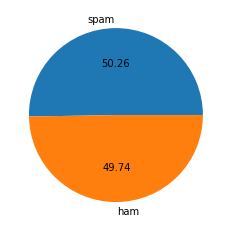

In [ ]:
#Visualisasi Count Dataset
plt.pie(count_value, labels = ["spam", "ham"], autopct = "%0.2f")

# Visualisasi word cloud

In [ ]:
# !pip install wordcloud

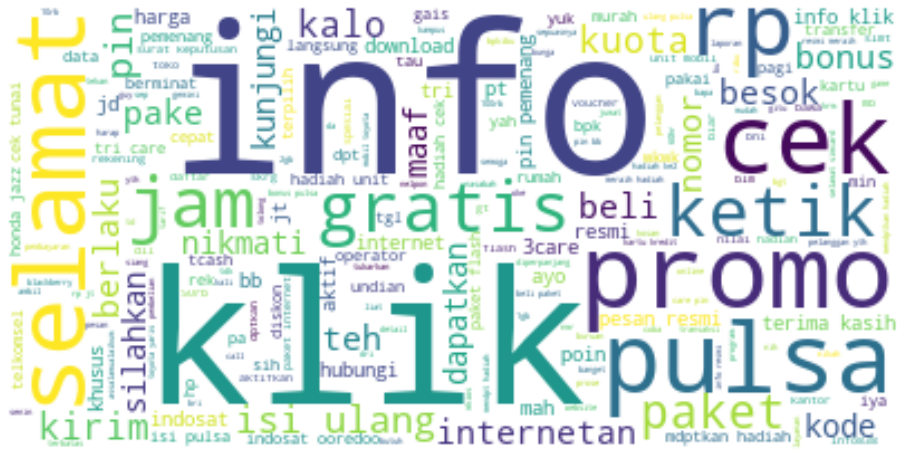

In [ ]:
fulltext = " ".join(i for i in data['Teks'])
wordcloud = WordCloud(background_color="white").generate(fulltext)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Model Naive Bayes

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob,Word

In [ ]:
# Menghapus karakter numerik dari teks
#data["Teks"] = data['Teks'].str.replace('[0-9]','')
#data

In [ ]:
# Lemmatisasi setiap kata di dataset

for i in range(len(data)):
    txt = data['Teks'].values[i]
    blb = TextBlob(txt)
    wrds = blb.words
    wrd_container = []
    for wrd in wrds:
        new_wrd = Word(wrd)
        lem_word = new_wrd.lemmatize()
        wrd_container.append(lem_word)
    wrd_line = ' '.join(wrd_container)
    data.Teks[i] = wrd_line
    
data.head()

,Teks,label
0,promo beli paket flash 1gb my telkomsel app dp...,1
1,25 gb30 rp 35 ribu spesial terpilih aktifkan 5...,1
2,20160708 114711plg yth sisa kuota flash 478kb ...,1
3,20160807 112947plg yth sisa kuota flash 7160kb...,1
4,45gb30 rp 55 ribu spesial terpilih aktifkan 55...,1


In [ ]:
# Konversi dataset teks menjadi angka
data.dropna(inplace=True)

X = data.Teks
y = data.label

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

vec = TfidfVectorizer()
training_x = vec.fit_transform(X_train)
testing_x = vec.transform(X_test)

print('Bentuk training X: {}\n'.format(training_x.shape))
print('Bentuk training y: {}\n'.format(y_train.shape))

Bentuk training X: (855, 4021)

Bentuk training y: (855,)



In [ ]:
# Pembuatan model Naive Bayes

naive_model = MultinomialNB()

# fitting model ke dataset numerik
naive_model.fit(training_x,y_train)

# membuat prediksi memakai model
predictions = naive_model.predict(testing_x)

# akurasi dari model
print('Accuracy score: {}\n'.format(accuracy_score(y_test,predictions)))

# laporan klasifikasi
print('Precision score: {}\n'.format(precision_score(y_test,predictions, average='micro')))
print('Recall score: {}\n'.format(recall_score(y_test,predictions, average='micro')))

Accuracy score: 0.9017543859649123

Precision score: 0.9017543859649123

Recall score: 0.9017543859649123



#Naive Bayes Test Model

In [ ]:
sms_message = [input("masukan SMS anda:")]

test = vec.transform(sms_message)

if naive_model.predict(test) == [0]:
  print('Bukan pesan spam')
else:
  print("AWAS PESAN SPAM!!")



masukan SMS anda:sedang ada dimana?
AWAS PESAN SPAM!!


# Model SVM 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
X2 = data['Teks'].values
y2 = data['label'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)
9
# Konversi dataset teks menjadi angka
cv = CountVectorizer() 
X_train2 = cv.fit_transform(X_train2)
X_test2 = cv.transform(X_test2)

In [ ]:
svm_model = SVC(kernel = 'rbf', random_state = 0)
svm_model.fit(X_train2, y_train2)

print("Accuracy score:", svm_model.score(X_test2,y_test2))

Accuracy score: 0.9122807017543859


#SVM Test Model

In [ ]:
sms_message = input("masukan SMS anda:")

test = cv.transform([sms_message])

if svm_model.predict(test) == [0]:
  print('Bukan pesan spam')
else:
  print("AWAS PESAN SPAM!!")

masukan SMS anda:sedang ada dimana?
Bukan pesan spam


# Ekspor model

In [ ]:
from joblib import dump, load
dump(naive_model, 'naive_model.joblib')
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']